In [1]:
from keras.datasets import mnist

(XTrain, YTrain), (XTest, YTest) = mnist.load_data()

Using TensorFlow backend.
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

11493376/11490434 [==============================] - 200s 17us/step


In [2]:
print('XTrain class = ',type(XTrain))
print('YTrain class = ',type(YTrain))
print('XTest shape = ',type(XTest))
print('YTest shape = ',type(YTest))

XTrain class =  <class 'numpy.ndarray'>
YTrain class =  <class 'numpy.ndarray'>
XTest shape =  <class 'numpy.ndarray'>
YTest shape =  <class 'numpy.ndarray'>


In [3]:
print('XTrain shape = ',XTrain.shape)
print('XTest shape = ',XTest.shape)
print('YTrain shape = ',YTrain.shape)
print('YTest shape = ',YTest.shape)

XTrain shape =  (60000, 28, 28)
XTest shape =  (10000, 28, 28)
YTrain shape =  (60000,)
YTest shape =  (10000,)


In [4]:
import numpy as np

print('YTrain values = ',np.unique(YTrain))
print('YTest values = ',np.unique(YTest))

YTrain values =  [0 1 2 3 4 5 6 7 8 9]
YTest values =  [0 1 2 3 4 5 6 7 8 9]


In [5]:
unique, counts = np.unique(YTrain, return_counts=True)
print('YTrain distribution = ',dict(zip(unique, counts)))

unique, counts = np.unique(YTest, return_counts=True)
print('YTrain distribution = ',dict(zip(unique, counts)))

YTrain distribution =  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
YTrain distribution =  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


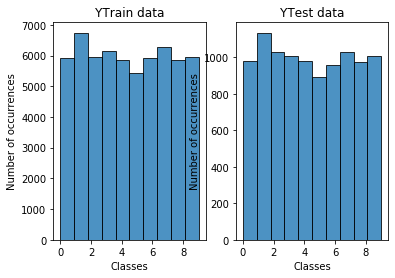

In [6]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(121)
plt.hist(YTrain, alpha=0.8, ec='black')
plt.xlabel("Classes")
plt.ylabel("Number of occurrences")
plt.title("YTrain data")

plt.subplot(122)
plt.hist(YTest, alpha=0.8, ec='black')
plt.xlabel("Classes")
plt.ylabel("Number of occurrences")
plt.title("YTest data")
plt.show()

In [7]:
XTrain = XTrain.astype('float32') / 255
XTest = XTest.astype('float32') / 255

XTrain = XTrain.reshape((len(XTrain), np.prod(XTrain.shape[1:])))
XTest = XTest.reshape((len(XTest), np.prod(XTest.shape[1:])))

print (XTrain.shape)
print (XTest.shape)

(60000, 784)
(10000, 784)


In [8]:
from keras.layers import Input 
from keras.layers import Dense
from keras.models import Model

InputModel = Input(shape=(784,))
EncodedLayer = Dense(32, activation='relu')(InputModel)
DecodedLayer = Dense(784, activation='sigmoid')(EncodedLayer)
AutoencoderModel = Model(InputModel, DecodedLayer)

In [9]:
AutoencoderModel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [10]:
AutoencoderModel.compile(optimizer='adadelta', loss='binary_crossentropy')

history = AutoencoderModel.fit(XTrain, XTrain,
                    batch_size=256,
                    epochs=100,
                    shuffle=True,
                    validation_data=(XTest, XTest))

DecodedDigits = AutoencoderModel.predict(XTest)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.3536 - val_loss: 0.2719
Epoch 2/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.2659 - val_loss: 0.2563
Epoch 3/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.2464 - val_loss: 0.2341
Epoch 4/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.2255 - val_loss: 0.2146
Epoch 5/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.2090 - val_loss: 0.2007
Epoch 6/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.1971 - val_loss: 0.1906
Epoch 7/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.1881 - val_loss: 0.1825
Epoch 8/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.1808 - val_loss: 0.1760
Epoch 9

60000/60000 [==============================] - 1s 10us/step - loss: 0.1002 - val_loss: 0.0987
Epoch 73/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.1001 - val_loss: 0.0985
Epoch 74/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.1000 - val_loss: 0.0984
Epoch 75/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.0999 - val_loss: 0.0983
Epoch 76/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.0998 - val_loss: 0.0982
Epoch 77/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.0997 - val_loss: 0.0982
Epoch 78/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.0996 - val_loss: 0.0980
Epoch 79/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.0995 - val_loss: 0.0979
Epoch 80/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.0994 - val_loss: 0.0978
Epoch 81/100
60000/60000 [========================

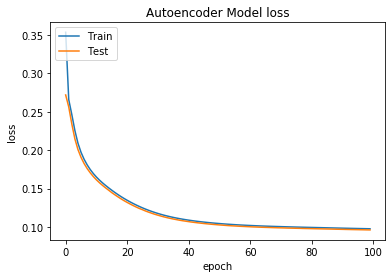

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

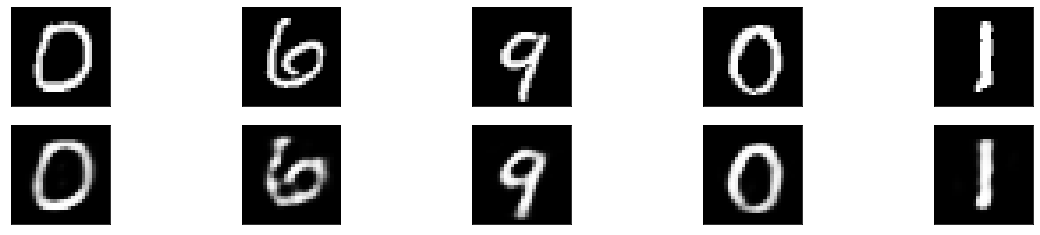

In [12]:
n=5
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(XTest[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(DecodedDigits[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()